# Hallucinogens 
Hallucinogens may cause people extreme psychological effects, such as specifically hallucinations, severe mood changes, and a distorted sense or reality. 
In the document, there are some some common hallucinogens to be discussed, including LSD, PCP, Peyote, Mescaline, Psilocybin and Ecstasy. Besides, it focuses on when people used first and the ages they were. 


In [2]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [3]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [4]:
case_quest_data = dataset.ix[:,0:2].copy()
hallucinogens = dataset.ix[:,'LSD':'ECSREC'].copy() # hallucinogens dataset

In [5]:
hallucinogens.shape

(55268, 37)

In [6]:
hallucinogens.head

<bound method NDFrame.head of        LSD  PCP  PEYOTE  MESC  PSILCY  ECSTASY  HALNOLST  HALNEWA  HALNEWB  \
0       91   91      91    91      91       91        91     9991     9991   
1       91   91      91    91      91       91        91     9991     9991   
2       91   91      91    91      91       91        91     9991     9991   
3        1    2       2     2       1        1         1     8227     9998   
4       91   91      91    91      91       91        91     9991     9991   
5       91   91      91    91      91       91        91     9991     9991   
6       91   91      91    91      91       91        91     9991     9991   
7       91   91      91    91      91       91        91     9991     9991   
8       91   91      91    91      91       91        91     9991     9991   
9        2    2       2     2       2        1         2     9999     9999   
10      91   91      91    91      91       91        91     9991     9991   
11      91   91      91    91     

* How many cases use the drug?
* What are their age range?
* How frequently they use it?
* Did they stop and go back to it?
* Are they planning to quit?

### 1. How many cases used the drug
There are many Hallucinogens discussed in the survey.


**We ignore few cases which answers were "Yes LOGICALLY ASSIGNED","DON'T KNOW" and "REFUSED".  


In [7]:
#Cases_LSD
hallucinogens.groupby('LSD').agg({ 'LSD': 'count'})

,LSD
LSD,
1,3647
2,3759
3,2
91,47816
94,39
97,5


In [8]:
#Count the number using diffirent type of Hallucinogens
Num_NeverUsedHallucinogens=hallucinogens.query('LSD ==91').shape[0]
Num_LSD=hallucinogens.query('LSD ==1').shape[0]
Num_PCP=hallucinogens.query('PCP ==1').shape[0]
Num_PEYOTE=hallucinogens.query('PCP ==1').shape[0]
Num_MESC=hallucinogens.query('MESC ==1').shape[0]
Num_PSILCY=hallucinogens.query('PSILCY ==1').shape[0]
Num_ECSTASY=hallucinogens.query('ECSTASY ==1').shape[0]
Num_HALNOLST=hallucinogens.query('HALNOLST ==1').shape[0]
Num__Hallucinogens =  {"Num":{"NeverUsedHallucinogens":Num_NeverUsedHallucinogens, "LSD":Num_LSD ,"PCP":Num_PCP,"PEYOTE":Num_PEYOTE,"MESC":Num_MESC,"PSILCY":Num_PSILCY,"ECSTASY":Num_ECSTASY,"HALNOLST":Num_HALNOLST}}


DF_Num__Hallucinogens=pd.DataFrame(Num__Hallucinogens).sort_values('Num', ascending = False)
DF_Num__Hallucinogens



,Num
NeverUsedHallucinogens,47816
PSILCY,4048
ECSTASY,4040
LSD,3647
HALNOLST,1112
MESC,875
PCP,843
PEYOTE,843


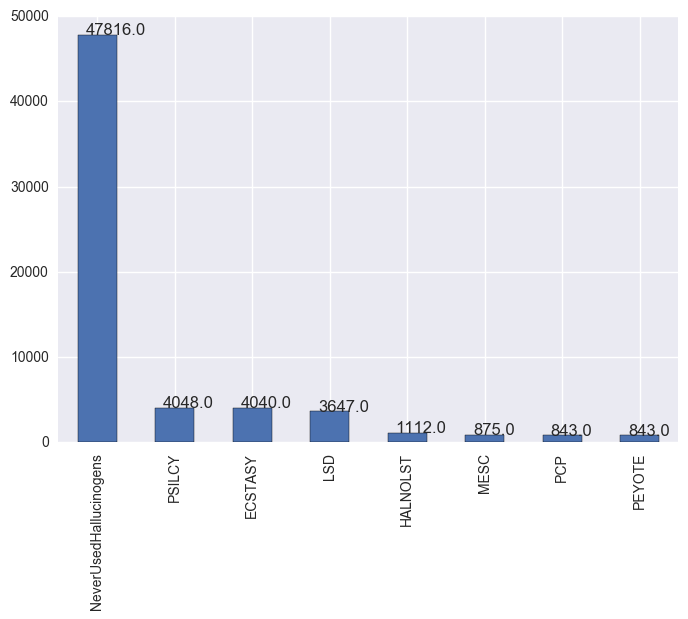

In [9]:
ax = DF_Num__Hallucinogens['Num'].plot.bar()

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1 , p.get_height()+50))

###  2.What are their age range?

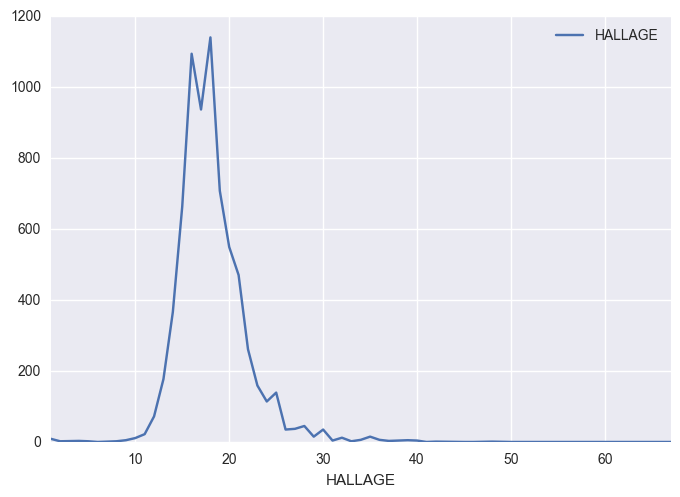

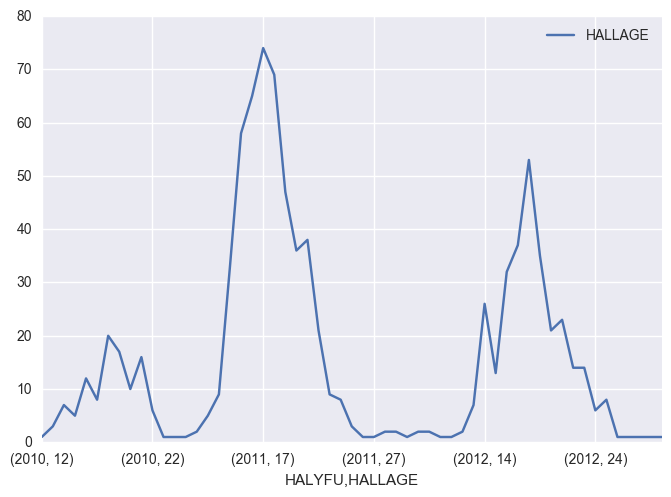

In [10]:
#query_data those who have used any one of the hallucinogens
hallucinogens_LSD=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&(HALLAGE <=69)')
count = hallucinogens_LSD.groupby('HALLAGE').agg({ 'HALLAGE': 'count'})
count.plot()

#hallucinogens_LSD.plot(kind='scatter', x='HALLAGE',y='LSD')

# year & age
hallucinogens_LSD2=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&(HALLAGE <=69)&(HALYFU<=2013)')
count_year = hallucinogens_LSD2.groupby(['HALYFU','HALLAGE']).agg({ 'HALLAGE': 'count'})
count_year.plot()
#count_year.plot(kind='scatter', x='HALYFU',y='HALLAGE')


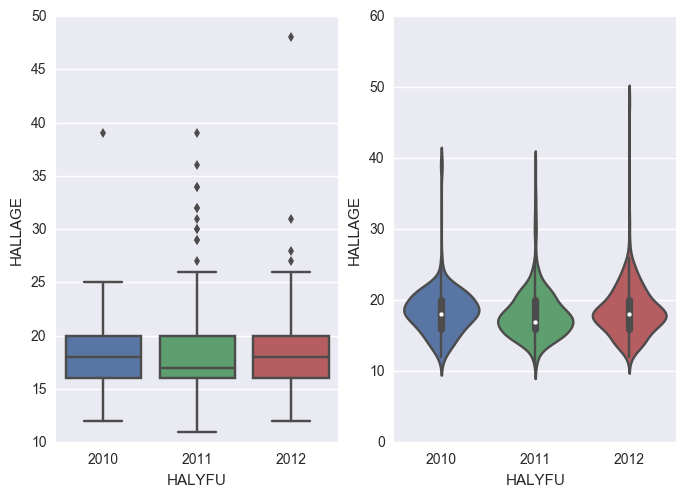

In [11]:
hallucinogens_YEAR_AGE=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&(HALLAGE <=69)& (HALYFU<=2012)')
#count = hallucinogens_LSD.groupby('HALLAGE').agg({ 'HALLAGE': 'count'})
#count.plot()
hallucinogens_YEAR_AGE.plot(kind='scatter', x='HALYFU',y='HALLAGE')

#playing with categories ... seaborn is pretty good with it
#plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='HALYFU',y='HALLAGE',data=hallucinogens_YEAR_AGE)

plt.subplot(122)
sns.violinplot(x='HALYFU',y='HALLAGE',data=hallucinogens_YEAR_AGE)

##pop_max = gap2007['pop'].max()
##for (name, group),color in zip(gap2007.groupby('continent'),colors):
##    plt.scatter(x=group['lifeExp'],y=group['gdpPercap'],label=name, c=color,s=(group['pop']/pop_max)*400)
##plt.yscale('log')
##plt.title('Life Expectancy vs GDP')
##plt.xlabel('Life Expectancy')
##plt.ylabel('GDP Per Cap')
##plt.legend()

### 3.How frequently they use it?
According to the survey, the easiest way to tell how frequently they used is in days per year. (HLBSTWAY)

,HLDAYPYR
HLDAYPYR,
1,285
2,99
3,66
4,31
5,28
6,10
7,5
8,2
9,2


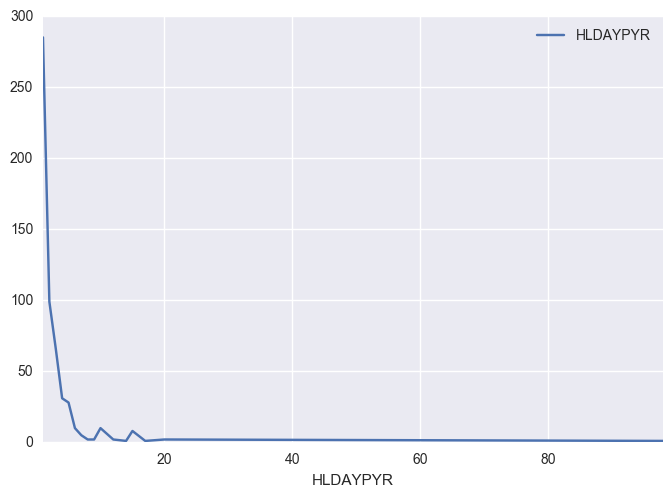

In [12]:
hallucinogens_fre=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&(HALLAGE <=69)& (HALYFU<=2012)& (HLDAYPYR<985)')
count_days = hallucinogens_fre.groupby('HLDAYPYR').agg({ 'HLDAYPYR': 'count'})
count_days.plot()
count_days

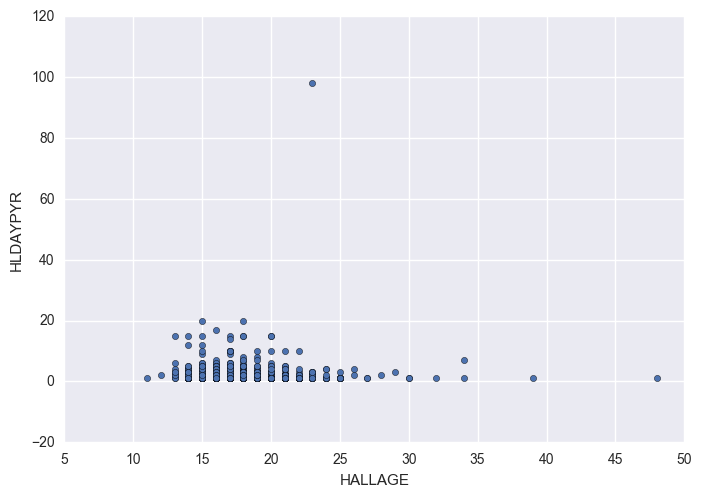

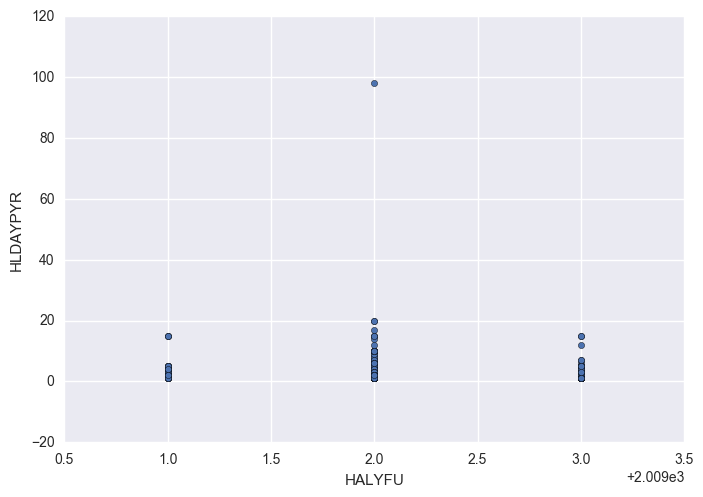

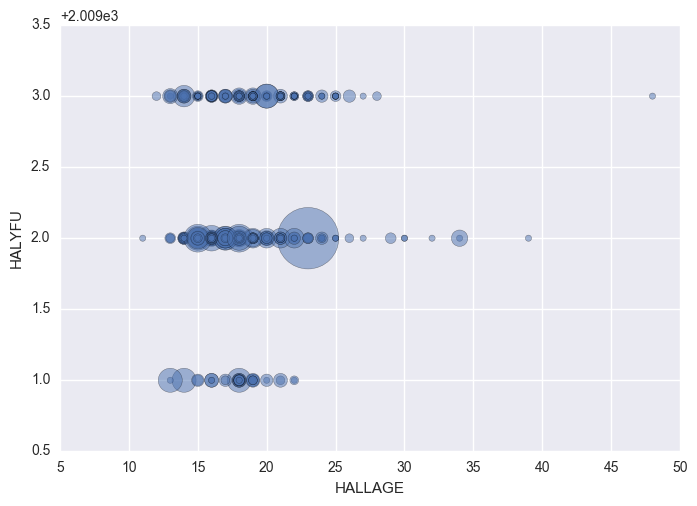

In [13]:
 #hallucinogens_fre
#count_days.plot()
hallucinogens_fre.plot(kind='scatter', x='HALLAGE',y='HLDAYPYR')
hallucinogens_fre.plot(kind='scatter', x='HALYFU',y='HLDAYPYR')
hallucinogens_fre.plot(kind='scatter', x='HALLAGE',y='HALYFU',s=hallucinogens_fre['HLDAYPYR']*20,alpha=0.5)

### 4.Did they stop and go back to it? Are they planning to quit?

In [14]:
hallucinogens_quit=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&((HALYRTOT<=358)|(HALYRTOT==993))')
hallucinogens_quit
count_quit_days = hallucinogens_quit.groupby('HALYRTOT').agg({ 'HALYRTOT': 'count'})
count_quit_days
#HALLREC
#HALYRTOT

,HALYRTOT
HALYRTOT,
1,482
2,283
3,173
4,94
5,98
6,42
7,43
8,21
9,11


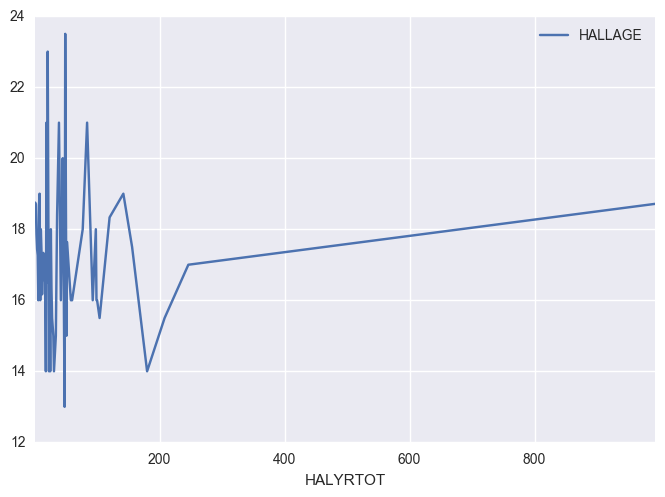

In [15]:
hallucinogens_quit2=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&(HALLAGE <=69)& (HALYFU<=2012)& (HLDAYPYR<985)&((HALYRTOT<=358)|(HALYRTOT==993))')
hallucinogens_quit3=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&(HALLAGE <=69)& (HALYFU<=2012)&((HALYRTOT<=358)|(HALYRTOT==993))')
hallucinogens_quit1=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&((HALYRTOT<=358)|(HALYRTOT==993))')
count_quit_days = hallucinogens_quit3.groupby('HALYRTOT').agg({ 'HALLAGE': 'mean'})
count_quit_days
#count_quit_days = hallucinogens_quit3.groupby('HALYRTOT').agg({ 'HALYRTOT': 'count'})
count_quit_days.plot()
#hallucinogens_quit2.plot(kind='scatter', x='HALLAGE',y='HALYRTOT')
#hallucinogens_quit2.plot(kind='scatter', x='HALLAGE',y='HALYFU',c='HALYRTOT')

## Next

[Inhalants](Inhalants.ipynb)